In [9]:
import pandas as pd
from sklearn.metrics import *

In [10]:
import numpy as np
import mpmath as mp

In [11]:
res=pd.read_csv("initial_results.csv")

In [12]:
res.index=res["Unnamed: 0"]

In [13]:
res=res.drop(columns='Unnamed: 0')

In [14]:
res

,pres1,pres2,pres3,rr1,rr2,rr3,cg1,cg2,cg3,ap1,ap2,ap3,types
Unnamed: 0,,,,,,,,,,,,,
summer,1.0,1.0,NaN,1,1,NaN,4.543559,4.543559,NaN,1.000000,1.000000,NaN,poem title
maya angelou,1.0,1.0,NaN,1,1,NaN,4.543559,4.543559,NaN,1.000000,1.000000,NaN,author
robert frost,1.0,1.0,NaN,1,1,NaN,4.543559,4.543559,NaN,1.000000,1.000000,NaN,author
poe,1.0,1.0,NaN,1,1,NaN,4.543559,4.543559,NaN,1.000000,1.000000,NaN,author
I love you,1.0,0.9,NaN,1,1,NaN,4.543559,3.912630,NaN,1.000000,0.841226,NaN,content/exact lyric
I want you,1.0,0.7,NaN,1,1,NaN,4.543559,3.439030,NaN,1.000000,0.859751,NaN,content/exact lyric
shakespeare,1.0,0.7,NaN,1,1,NaN,4.543559,3.467611,NaN,1.000000,0.863152,NaN,author
understand,0.9,0.8,NaN,1,1,NaN,3.912630,3.623565,NaN,0.841226,0.833879,NaN,title/synonyms
bukowski,1.0,0.8,NaN,1,1,NaN,4.543559,3.579296,NaN,1.000000,0.797222,NaN,author


In [15]:
queries=list(pd.read_csv(r"C:\Users\user\Downloads\Query evaluation - Sheet1.csv")[3:]["Unnamed: 1"])

In [16]:
types=list(pd.read_csv(r"C:\Users\user\Downloads\Query evaluation - Sheet1.csv")[3:]["Unnamed: 2"])

In [17]:
results1=[]
results2=[]
results3=[]
for query in queries:
    f1 = open(r"C:\Users\user\\"+query+".txt", "r")
    f2 = open(r"C:\Users\user\\"+query+".txt", "r")
    f3 = open(r"C:\Users\user\\"+query+".txt", "r")
    text1=f1.read().split('\n')[:10]
    text2=f2.read().split('\n')[10:20]
    text3=f3.read().split('\n')[20:30]
    results1.append(text1)
    results2.append(text2)
    results3.append(text3)



In [18]:
results3[19]=10*['1']

In [19]:
for i in range(20):
    for j in range(10):
        if results1[i][j]!='1' and results1[i][j]!='0':
            results1[i][j]='1'
        if results2[i][j]!='1' and results2[i][j]!='0':
            results2[i][j]='1'
        if results3[i][j]!='1' and results3[i][j]!='0':
            results3[i][j]='1'

In [20]:
for i in range(20):
    for j in range(10):
        results1[i][j]=int(results1[i][j])
        results2[i][j]=int(results2[i][j])
        results3[i][j]=int(results3[i][j])

In [27]:
sum([val for sublist in results1 for val in sublist])

169

In [24]:
results1,results2,results3

([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
  [0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
  [1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
  [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 1, 0, 1, 1, 1, 0, 1, 0, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
  [1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
  [1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
  [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
  [0, 0, 1, 1

In [50]:
coef(results1,results2)

0.2088346794132191

In [45]:
def coef(l1,l2):
    l11=[val for sublist in l1 for val in sublist]
    rel1=sum(l11)
    l22=[val for sublist in l2 for val in sublist]
    rel2=sum(l22)
    comp=[l11[i]==l22[i] for i in range(len(l11))]
    agr=len([x for x in comp if x==True])
    pA=agr/200
    pRel=rel1/200*rel2/200
    pIrrel=(200-rel1)/200*(200-rel2)/200
    pE=pRel+pIrrel
    coef=(pA-pE)/(1-pE)
    return(coef)
    

In [36]:
def precision(l,num):
    return precision_score(y_true=num*[1],y_pred=l[:num],average="micro")
def rec_rank(l):
    return 1/(l.index(1)+1)
    
def cg(l):
    summ=0
    for i in range(len(l)):
        summ=summ+(2**l[i] - 1)/np.log2(i+2)
    return summ/4.54356
def av_prec(l):
    summ=0
    count=0
    for i in range(len(l)):
        if l[i]==1:
            summ=summ+precision(l,i+1)
            count+=1
    return summ/count

In [37]:
df=pd.DataFrame(index=queries,columns=['pres1','pres2','pres3','rr1','rr2','rr3','cg1','cg2','cg3','ap1','ap2','ap3'])

In [38]:
for i in range(len(df)):
    df.at[df.index[i],'pres1']=precision(results1[i],10)
    df.at[df.index[i],'rr1']=rec_rank(results1[i])
    df.at[df.index[i],'cg1']=cg(results1[i])
    df.at[df.index[i],'ap1']=av_prec(results1[i])
for i in range(len(df)):
    df.at[df.index[i],'pres2']=precision(results2[i],10)
    df.at[df.index[i],'rr2']=rec_rank(results2[i])
    df.at[df.index[i],'cg2']=cg(results2[i])
    df.at[df.index[i],'ap2']=av_prec(results2[i])
for i in range(len(df)):
    df.at[df.index[i],'pres3']=precision(results3[i],10)
    df.at[df.index[i],'rr3']=rec_rank(results3[i])
    df.at[df.index[i],'cg3']=cg(results3[i])
    df.at[df.index[i],'ap3']=av_prec(results3[i])

In [40]:
df["Mean Precision at 10"]=(df.pres1+df.pres2+df.pres3)/3
df["Mean Reciprocal Rank"]=(df.rr1+df.rr2+df.rr3)/3
df["Mean Normalized Discounted Cumulative Gain"]=(df.cg1+df.cg2+df.cg3)/3
df["Mean Average Precision"]=(df.ap1+df.ap2+df.ap3)/3



In [39]:
df["Search Type"]=types

In [58]:
df=df[["Search Type","Mean Precision at 10", "Mean Reciprocal Rank","Mean Average Precision","Mean Normalized Discounted Cumulative Gain"]]

In [52]:
np.mean(list(df["Mean Precision at 10"]))

0.8549999999999999

In [55]:
hi=["",np.mean(list(df["Mean Precision at 10"])),np.mean(list(df["Mean Reciprocal Rank"])),np.mean(list(df["Mean Average Precision"])),np.mean(list(df["Mean Normalized Discounted Cumulative Gain"]))]

In [59]:
df.loc["Total"]=hi

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
df

,Search Type,Mean Precision at 10,Mean Reciprocal Rank,Mean Average Precision,Mean Normalized Discounted Cumulative Gain
summer,poem title,1,1,1,1
maya angelou,author,1,1,1,1
robert frost,author,1,1,1,1
poe,author,1,1,1,1
I love you,content/exact lyric,0.966667,1,0.947075,0.953712
I want you,content/exact lyric,0.866667,1,0.929338,0.890586
shakespeare,author,0.9,1,0.954384,0.921064
understand,title/synonyms,0.9,1,0.891702,0.886218
bukowski,author,0.933333,1,0.932407,0.929258
I wonder why,content/exact lyric,0.666667,0.555556,0.601213,0.588629


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  


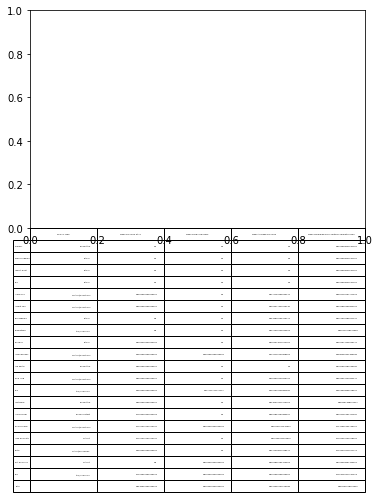

In [65]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=True) # no visible frame
ax.xaxis.set_visible(True)  # hide the x axis
ax.yaxis.set_visible(True)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')